<a href="https://colab.research.google.com/github/hanlinz-star/Exercise-2/blob/main/Exercise05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preparation

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_exercise_5_clustering_highway_traffic.csv to dataset_exercise_5_clustering_highway_traffic (1).csv
Saving evaluation_dataset_exercise_5_clustering_highway_traffic.csv to evaluation_dataset_exercise_5_clustering_highway_traffic.csv


In [4]:
import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab

data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df



,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [5]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset'
print(vectorized_day_dataset)

/tmp/ipython-input-2050002240.py:22: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(days[i])
/tmp/ipython-input-2050002240.py:27: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_subsets_df.get_group(days[i])


[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]


## Missing values and outliers

In [6]:
print('number of nans',np.sum(np.isnan(vectorized_day_dataset)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

number of nans 277
rate of nans 0.0026350837138508373


(288,)


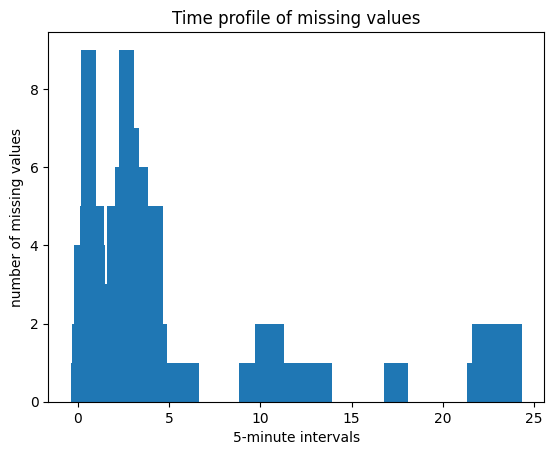

In [7]:
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
print(nans_per_time.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)


ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

In [8]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 28


## Daily profile of flow dynamic

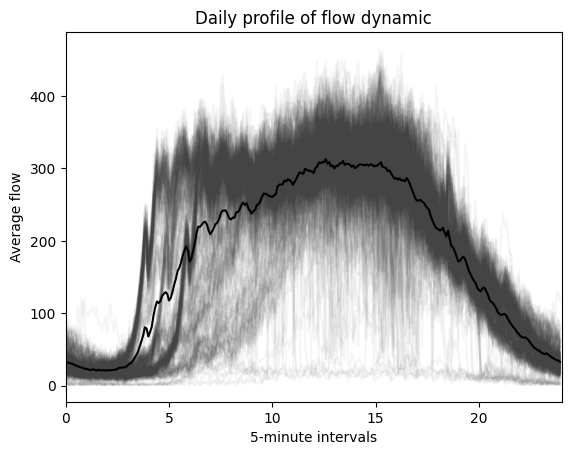

In [9]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()# a convenient way to create a new figure and a set of subplots.
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),vectorized_day_dataset.transpose(),color='#444444',alpha=0.05)
# Above line plots the dataset with specified color and transparency.
ax.plot(x_axis_hours,np.transpose(np.nanmean(vectorized_day_dataset,0)),color='black')
# Above line plots the average of the dataset in black color.

ax.set_ylabel('Average flow')
ax.set_xlabel('5-minute intervals')
plt.xlim(0,24)
ax.set_title('Daily profile of flow dynamic')

plt.show()

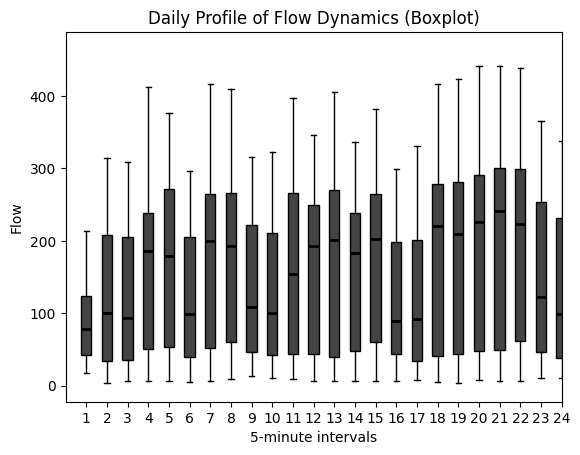

In [10]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()  # This line is a convenient way to create a new figure and a set of subplots.

# Create a boxplot for the dataset
boxplot = ax.boxplot(vectorized_day_dataset.T, patch_artist=True)

# Customize the boxplot appearance
for patch in boxplot['boxes']:
    patch.set_facecolor('#444444')  # Set the box color to gray
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)  # Set median line color to black

# Set the y-axis label
ax.set_ylabel('Flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics (Boxplot)')

# Display the plot
plt.show()

In [11]:
import datetime

# Create an array 'day_of_week' to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Parse the current date from a string to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')

    # Get the day of the week (1 for Monday, 2 for Tuesday, ..., 7 for Sunday)
    day_of_week[i] = day_dt.isoweekday()

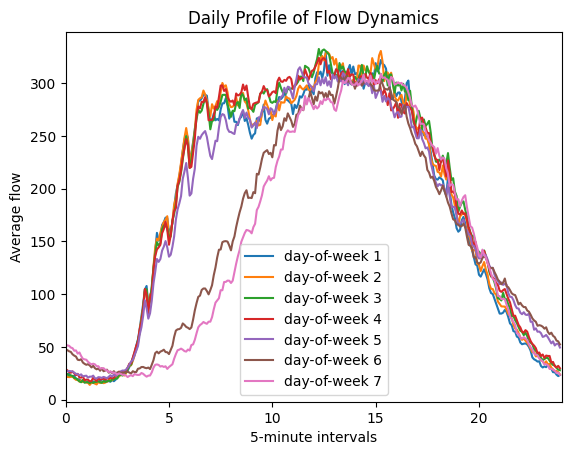

In [12]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Iterate through each day of the week (from 1 to 7)
for i in range(1, 8):
    # Find the indices of days that correspond to the current day of the week
    day_of_week_index_t = np.where(day_of_week == i)

    # Calculate the number of days that match the current day of the week
    ndays_t = np.size(day_of_week_index_t[0])

    # Plot the average flow for the current day of the week
    ax.plot(x_axis_hours,
            np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :].transpose(), 1),
            label='day-of-week ' + str(i))
    # This line plots the average flow for the current day of the week.
    # 'np.nanmean()' calculates the mean while handling NaN values.

# Set the y-axis label
ax.set_ylabel('Average flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics')

# Add a legend indicating the day of the week
ax.legend()

# Display the plot
plt.show()

In [42]:

from dateutil.relativedelta import relativedelta
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib import colors

def assign_colors(n_clusters, days, assigments):

    days_colors = []
    color_to_cluster = []
    style_to_cluster = []
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
#    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
#    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    for i in range(0,n_clusters):
        color_to_cluster.append(None)
        style_to_cluster.append(None)
        cluster_id_weekdays_share.append(0)
        cluster_id_weekend_share.append(0)
        cluster_id_all_days.append(0)

    for i in range(0,len(days)):
        #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'

            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)

    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
           limit_graphics=False):

    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders

    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()

    for month in range(1,13):

        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]

        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",

                       linewidth=1, zorder=20, clip_on=False)

        ax.add_artist(poly)

    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

    # Clearing first and last day from the data
    valid = datetime.datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime.datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]


    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):

        week_number = int(act_date.strftime("%W"))
        day_of_week = int(act_date.weekday())
        doy_id = act_date.timetuple().tm_yday
        if doy_id<5 and week_number > 53:
            week_number = 0

        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10

    # Showing data
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    cmap = colors.ListedColormap(color_to_cluster)
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #print(color_to_cluster)
   #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                       save_figure: str = None, show_figure:bool = True, limit_graphics = False):

    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
    X = np.linspace(-1,1, 53*7)

    for i, obj in enumerate(years):

        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan)
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)
    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                          save_figure: str = None, show_figure:bool = True):

    #print(color_to_cluster)
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])
    plt.legend()

    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()



## Clustering：Kmeans

Cluster labels (KMeans): [4 4 4 9 1 4 9 9 4 4 5 9 9 9 9 4 4 9 9 3 3 3 4 4 9 9 5 9 4 4 9 5 9 9 9 4 4
 9 9 9 5 9 4 4 9 9 3 3 4 4 3 3 3 9 4 4 3 3 9 3 9 4 4 3 9 9 9 3 4 4 3 3 3 3
 3 4 4 3 3 9 3 3 1 3 3 4 4 4 4 9 3 3 3 4 4 3 3 3 3 3 4 4 3 3 3 3 3 4 4 3 3
 3 3 3 4 1 2 2 2 2 2 5 1 2 2 8 5 0 5 1 2 2 5 1 2 2 2 2 2 5 1 2 2 8 2 8 5 1
 2 2 8 8 8 5 1 2 8 2 2 0 5 1 2 2 8 2 5 4 1 8 0 2 8 0 5 7 0 8 0 5 5 0 0 0 0
 0 5 5 0 0 0 0 0 5 5 0 0 5 1 0 0 0 7 1 1 0 0 0 2 0 5 1 2 2 2 2 8 1 1 2 2 2
 2 8 1 1 2 2 2 2 8 5 2 1 1 2 2 8 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 7 2 2 2 1 1
 2 2 2 2 8 5 1 2 2 2 8 0 1 1 8 2 2 2 1 1 6 6 6 6 4 1 6 6 6 6 1 1 6 6 6 6 6
 1 1 6 6 6 6 6 1 4 6 6 6 6 6 1 4 6 6 6 9 1 1 6 6 6 6 6 1 1 6 6 6 5 4 4 4 5
 1 1 1 4]
KMeans Silhouette Score: 0.1888295110481911
KMeans Davies-Bouldin Score: 1.7434244441047695
KMeans Calinski-Harabasz Score: 81.05449965897482


/tmp/ipython-input-1712547087.py:34: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_t = day_eval_subsets_df.get_group(days_eval[i])


Final number of days in evaluation dataset (no NaNs): 69
KMeans Prediction accuracy MAE: 19.858708585119732
KMeans Prediction accuracy MAPE: 0.18276535079525502
cluster_id_weekdays_share [26, 4, 66, 42, 6, 8, 34, 1, 18, 31]
cluster_id_weekend_share [0, 42, 0, 0, 39, 18, 0, 2, 0, 0]


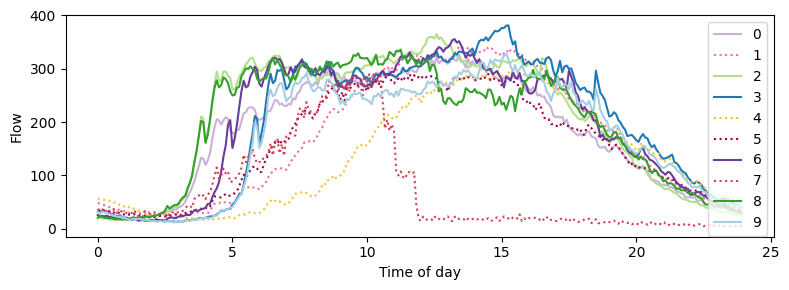

111


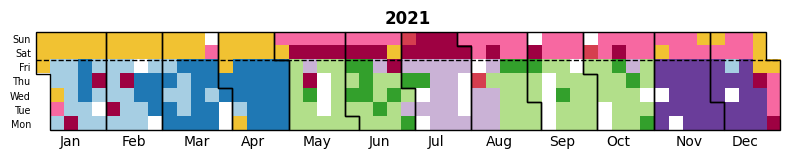

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
import sklearn.metrics.pairwise as dis_lib
import numpy as np
import pandas as pd

# ------------------- Clustering -------------------
n_clusters = 10
clusters_kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans)
cluster_labels_kmeans = clusters_kmeans.labels_

print("Cluster labels (KMeans):", cluster_labels_kmeans)

# ------------------- Internal Evaluation -------------------
SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels_kmeans)
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels_kmeans)
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels_kmeans)

print('KMeans Silhouette Score:', SC_score)
print('KMeans Davies-Bouldin Score:', DB_score)
print('KMeans Calinski-Harabasz Score:', CH_score)

# ------------------- External Evaluation -------------------
data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")
data_eval_df.sort_values(["Date", "Interval_5"])
days_eval = np.unique(data_eval_df[['Date']].values.ravel())
ndays_eval = len(days_eval)

day_eval_subsets_df = data_eval_df.groupby(["Date"])
vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)

for i in range(0, ndays_eval):
    df_t = day_eval_subsets_df.get_group(days_eval[i])
    for j in range(len(df_t)):
        vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)
vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]
ndays_eval_not_nans = len(days_not_nans_eval)

print('Final number of days in evaluation dataset (no NaNs):', ndays_eval_not_nans)

def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None
    for i in range(0, len(centroids)):
        ed_t = dis_lib.paired_distances(
            centroids[i][:, from_interval:to_interval],
            new_day[:, from_interval:to_interval],
            metric='euclidean'
        )
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t
    return closest_centroid

centroids_kmeans = []
for i in np.unique(cluster_labels_kmeans):
    centroid = np.nanmean(
        vectorized_day_dataset_no_nans[np.where(cluster_labels_kmeans == i)[0], :], 0
    ).reshape(1, nintvals)
    centroids_kmeans.append(centroid)

n_past_intervals_for_classification = 5
total_mae, total_mape, prediction_counts = 0, 0, 0

for i in range(0, ndays_eval_not_nans):
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        centroid_index = find_the_closest_centroid(
            centroids_kmeans,
            vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals),
            j - n_past_intervals_for_classification,
            j
        )
        predicted_value = centroids_kmeans[centroid_index][0, j + 1]
        true_value = vectorized_day_dataset_no_nans_eval[i][j + 1]

        mae_t = abs(predicted_value - true_value)
        mape_t = abs(predicted_value - true_value) / true_value if true_value != 0 else 0

        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

print('KMeans Prediction accuracy MAE:', total_mae / prediction_counts)
print('KMeans Prediction accuracy MAPE:', total_mape / prediction_counts)

# ------------------- Visualization (centroids + calendar) -------------------
n_clusters_t = len(np.unique(cluster_labels_kmeans))
days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans, cluster_labels_kmeans)

centroids_xx, centroids_yy_daytypes, cluster_ids = [], [], []
for i in range(0, n_clusters_t):
    centroids_xx.append(x_axis_hours)
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels_kmeans == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)
    cluster_ids.append(i)

make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)

make_calendar_visualization_figure(days_not_nans, cluster_labels_kmeans, n_clusters_t, [2021],
                                   days_colors, color_to_cluster, save_figure=None)


## Clustering：Agglomerative

Cluster labels (Agglomerative): [8 1 1 6 0 1 0 0 1 1 4 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 4 0 1 1 0 4 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 6 1 1 0 0 0 4 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 6 2 2 2 2 2 6 6 2 2 2 4 7 6 6 2 2 6 6 2 2 2 2 2 6 6 2 2 2 2 2 4 6
 2 2 2 2 2 6 6 2 2 2 2 2 4 6 2 2 2 2 4 8 6 2 2 2 2 2 4 9 7 2 2 4 4 7 7 7 7
 7 4 4 7 7 7 7 7 4 4 7 7 4 6 7 7 7 9 6 6 2 2 2 2 2 6 6 2 5 2 2 2 6 6 2 2 2
 2 2 6 6 2 2 2 2 2 4 2 6 6 2 2 2 2 2 6 6 2 2 2 2 6 6 5 2 2 2 2 9 2 2 2 6 6
 2 2 2 2 2 6 6 5 2 2 2 2 6 6 2 2 2 2 6 6 3 3 3 3 1 6 3 3 3 3 6 6 3 3 3 3 3
 6 1 3 5 3 3 3 6 1 3 3 3 3 3 1 1 3 3 3 5 1 1 3 3 3 3 3 1 1 3 3 3 4 8 8 1 4
 6 6 6 8]
Agglomerative Silhouette Score: 0.21506167345844876
Agglomerative Davies-Bouldin Score: 1.4150683146774594
Agglomerative Calinski-Harabasz Score: 78.95519615286356
Agglomerative Prediction accuracy MAE: 20.532620109946215
Agglomerative Prediction accuracy MAPE: 0.1852236646572384
cl

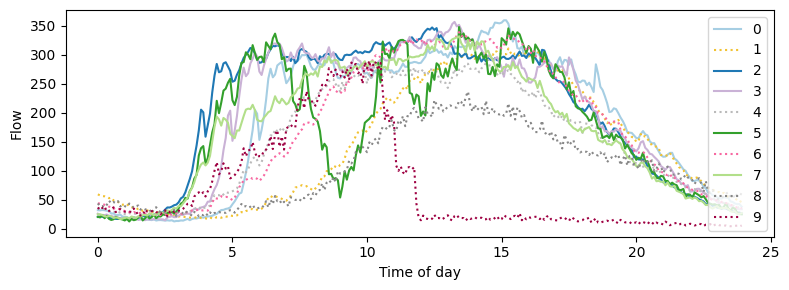

111


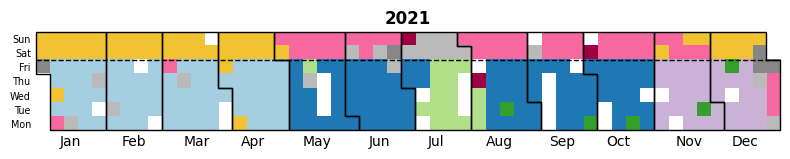

In [54]:
from sklearn.cluster import AgglomerativeClustering

# ------------------- Clustering -------------------
n_clusters = 10
clusters_aggl = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward').fit(vectorized_day_dataset_no_nans)
cluster_labels_aggl = clusters_aggl.labels_

print("Cluster labels (Agglomerative):", cluster_labels_aggl)

# ------------------- Internal Evaluation -------------------
SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels_aggl)
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels_aggl)
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels_aggl)

print('Agglomerative Silhouette Score:', SC_score)
print('Agglomerative Davies-Bouldin Score:', DB_score)
print('Agglomerative Calinski-Harabasz Score:', CH_score)

# ------------------- External Evaluation -------------------
centroids_aggl = []
for i in np.unique(cluster_labels_aggl):
    centroid = np.nanmean(
        vectorized_day_dataset_no_nans[np.where(cluster_labels_aggl == i)[0], :], 0
    ).reshape(1, nintvals)
    centroids_aggl.append(centroid)

n_past_intervals_for_classification = 5
total_mae, total_mape, prediction_counts = 0, 0, 0

for i in range(0, ndays_eval_not_nans):
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        centroid_index = find_the_closest_centroid(
            centroids_aggl,
            vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals),
            j - n_past_intervals_for_classification,
            j
        )
        predicted_value = centroids_aggl[centroid_index][0, j + 1]
        true_value = vectorized_day_dataset_no_nans_eval[i][j + 1]

        mae_t = abs(predicted_value - true_value)
        mape_t = abs(predicted_value - true_value) / true_value if true_value != 0 else 0

        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

print('Agglomerative Prediction accuracy MAE:', total_mae / prediction_counts)
print('Agglomerative Prediction accuracy MAPE:', total_mape / prediction_counts)

# ------------------- Visualization -------------------
n_clusters_t = len(np.unique(cluster_labels_aggl))
days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans, cluster_labels_aggl)

centroids_xx, centroids_yy_daytypes, cluster_ids = [], [], []
for i in range(0, n_clusters_t):
    centroids_xx.append(x_axis_hours)
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels_aggl == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)
    cluster_ids.append(i)

make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)
make_calendar_visualization_figure(days_not_nans, cluster_labels_aggl, n_clusters_t, [2021],
                                   days_colors, color_to_cluster, save_figure=None)


## Clustering:DBSCAN

Cluster labels (DBSCAN): [-1  0  0 -1  1  0  1  1  0  0 -1 -1 -1 -1 -1  0  0  1 -1  1  1  1  0  0
 -1 -1 -1  1  0  0 -1 -1 -1 -1 -1  0  0  1  1  1 -1  1  0  0  1  1  1 -1
  0  0  1 -1 -1 -1  0  0  1  1 -1  1 -1  0  0  1 -1  1 -1  1  0  0  1  1
  1 -1  1  0  0  1 -1 -1 -1  1  0 -1 -1 -1  0  0  0 -1  1  1 -1  0  0 -1
  1  1 -1  1  0  0  1 -1  1  1 -1  0  0 -1  1 -1 -1 -1  0  2  3  3  3 -1
 -1  2  2 -1 -1 -1 -1  4  2  2 -1 -1  2  2 -1  3  3  3 -1  2  2 -1 -1 -1
  3 -1 -1  2  3  3 -1 -1 -1 -1  2 -1 -1  3  3 -1  2  2  3 -1 -1  3 -1 -1
  2 -1 -1 -1 -1 -1  2 -1 -1 -1  4  2  2  4  4 -1  4  4  2  2  4 -1  4  4
  4  2  2  4 -1  2  2  4 -1  4 -1  2  2 -1 -1 -1  4 -1 -1  2  3 -1 -1 -1
 -1  2 -1 -1  3 -1 -1 -1 -1  2  3  3  3 -1 -1 -1  3  2  2  3  3 -1  3 -1
  2  2  3  3 -1 -1 -1  2 -1 -1  3 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  3  3 -1
 -1 -1 -1  3  3 -1 -1  2 -1 -1 -1  3  3  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0 -1  5 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1  0  0  5  5 -

/tmp/ipython-input-2832611821.py:65: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels_dbscan == i)[0], :], 0).transpose())


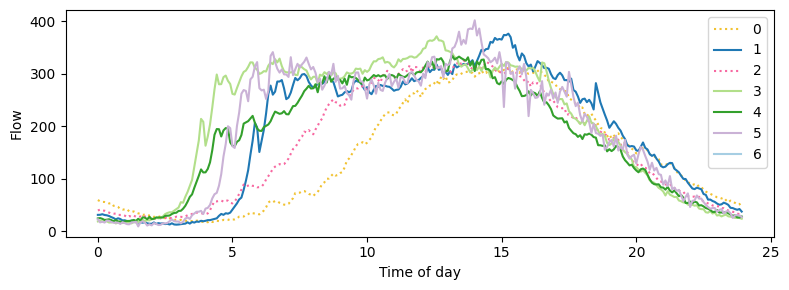

111


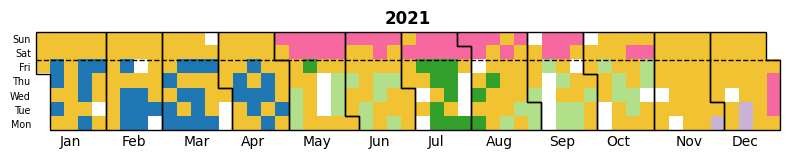

In [55]:
from sklearn.cluster import DBSCAN

# ------------------- Clustering -------------------
clusters_dbscan = DBSCAN(eps=500, min_samples=2).fit(vectorized_day_dataset_no_nans)
cluster_labels_dbscan = clusters_dbscan.labels_

print("Cluster labels (DBSCAN):", cluster_labels_dbscan)

# ------------------- Internal Evaluation -------------------
if len(np.unique(cluster_labels_dbscan)) > 1:
    SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels_dbscan)
    DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels_dbscan)
    CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels_dbscan)

    print('DBSCAN Silhouette Score:', SC_score)
    print('DBSCAN Davies-Bouldin Score:', DB_score)
    print('DBSCAN Calinski-Harabasz Score:', CH_score)
else:
    print("DBSCAN produced only one cluster; internal evaluation skipped.")

# ------------------- External Evaluation -------------------
centroids_dbscan = []
for i in np.unique(cluster_labels_dbscan):
    if i != -1:
        centroid = np.nanmean(
            vectorized_day_dataset_no_nans[np.where(cluster_labels_dbscan == i)[0], :], 0
        ).reshape(1, nintvals)
        centroids_dbscan.append(centroid)

n_past_intervals_for_classification = 5
total_mae, total_mape, prediction_counts = 0, 0, 0

for i in range(0, ndays_eval_not_nans):
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        if len(centroids_dbscan) == 0:
            continue
        centroid_index = find_the_closest_centroid(
            centroids_dbscan,
            vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals),
            j - n_past_intervals_for_classification,
            j
        )
        predicted_value = centroids_dbscan[centroid_index][0, j + 1]
        true_value = vectorized_day_dataset_no_nans_eval[i][j + 1]

        mae_t = abs(predicted_value - true_value)
        mape_t = abs(predicted_value - true_value) / true_value if true_value != 0 else 0

        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

if prediction_counts > 0:
    print('DBSCAN Prediction accuracy MAE:', total_mae / prediction_counts)
    print('DBSCAN Prediction accuracy MAPE:', total_mape / prediction_counts)

# ------------------- Visualization -------------------
if len(np.unique(cluster_labels_dbscan)) > 1:
    n_clusters_t = len(np.unique(cluster_labels_dbscan))
    days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans, cluster_labels_dbscan)

    centroids_xx, centroids_yy_daytypes, cluster_ids = [], [], []
    for i in range(0, n_clusters_t):
        centroids_xx.append(x_axis_hours)
        centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels_dbscan == i)[0], :], 0).transpose())
        centroids_yy_daytypes.append(centroid_yy)
        cluster_ids.append(i)

    make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)
    make_calendar_visualization_figure(days_not_nans, cluster_labels_dbscan, n_clusters_t, [2021],
                                       days_colors, color_to_cluster, save_figure=None)


## Clustering:GMM

Cluster labels (GMM): [4 4 4 9 1 4 9 9 4 4 5 9 9 9 9 4 4 9 9 3 3 3 4 4 9 9 5 9 4 4 9 5 9 9 9 4 4
 9 9 9 5 9 4 4 9 9 3 3 4 4 3 3 3 9 4 4 3 3 9 3 9 4 4 3 9 9 9 3 4 4 3 3 3 3
 3 4 4 3 3 9 3 3 1 3 3 4 4 4 4 9 3 3 3 4 4 3 3 3 3 3 4 4 3 3 3 3 3 4 4 3 3
 3 3 3 4 1 2 2 2 2 2 5 1 2 2 8 5 0 5 1 2 2 5 1 2 2 2 2 2 5 1 2 2 8 2 8 5 1
 2 2 8 8 8 5 1 2 8 2 2 0 5 1 2 2 8 2 5 4 1 8 0 2 8 0 5 7 0 8 0 5 5 0 0 0 0
 0 5 5 0 0 0 0 0 5 5 0 0 5 1 0 0 0 7 1 1 0 0 0 2 0 5 1 2 2 2 2 8 1 1 2 2 2
 2 8 1 1 2 2 2 2 8 5 2 1 1 2 2 8 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 7 2 2 2 1 1
 2 2 2 2 8 5 1 2 2 2 8 0 1 1 8 2 2 2 1 1 6 6 6 6 4 1 6 6 6 6 1 1 6 6 6 6 6
 1 1 6 6 6 6 6 1 4 6 6 6 6 6 1 4 6 6 6 9 1 1 6 6 6 6 6 1 1 6 6 6 5 4 4 4 5
 1 1 1 4]
GMM Silhouette Score: 0.1888295110481911
GMM Davies-Bouldin Score: 1.7434244441047695
GMM Calinski-Harabasz Score: 81.05449965897482
GMM Prediction accuracy MAE: 19.858708585119732
GMM Prediction accuracy MAPE: 0.18276535079525502
cluster_id_weekdays_share [26, 4, 66, 42, 6, 8, 34, 1, 18, 31]

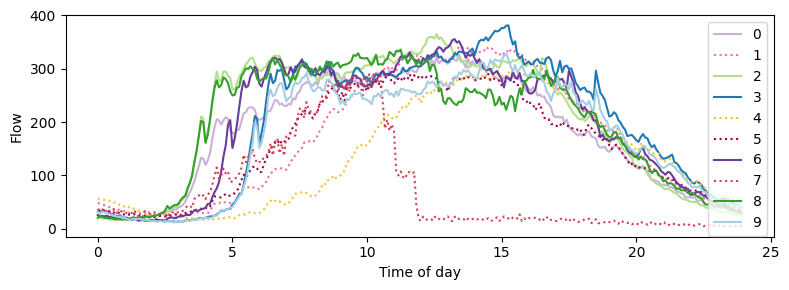

111


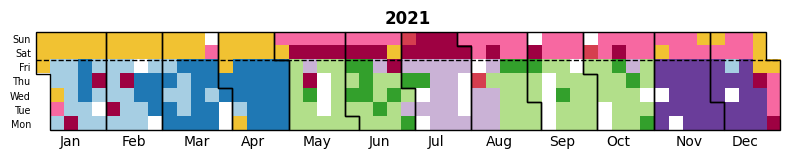

In [57]:
from sklearn.mixture import GaussianMixture

# ------------------- Clustering -------------------
n_clusters = 10
clusters_gmm = GaussianMixture(n_components=n_clusters, random_state=0).fit(vectorized_day_dataset_no_nans)
cluster_labels_gmm = clusters_gmm.predict(vectorized_day_dataset_no_nans)

print("Cluster labels (GMM):", cluster_labels_gmm)

# ------------------- Internal Evaluation -------------------
SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels_gmm)
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels_gmm)
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels_gmm)

print('GMM Silhouette Score:', SC_score)
print('GMM Davies-Bouldin Score:', DB_score)
print('GMM Calinski-Harabasz Score:', CH_score)

# ------------------- External Evaluation -------------------
centroids_gmm = []
for i in np.unique(cluster_labels_gmm):
    centroid = np.nanmean(
        vectorized_day_dataset_no_nans[np.where(cluster_labels_gmm == i)[0], :], 0
    ).reshape(1, nintvals)
    centroids_gmm.append(centroid)

n_past_intervals_for_classification = 5
total_mae, total_mape, prediction_counts = 0, 0, 0

for i in range(0, ndays_eval_not_nans):
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        centroid_index = find_the_closest_centroid(
            centroids_gmm,
            vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals),
            j - n_past_intervals_for_classification,
            j
        )
        predicted_value = centroids_gmm[centroid_index][0, j + 1]
        true_value = vectorized_day_dataset_no_nans_eval[i][j + 1]

        mae_t = abs(predicted_value - true_value)
        mape_t = abs(predicted_value - true_value) / true_value if true_value != 0 else 0

        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

print('GMM Prediction accuracy MAE:', total_mae / prediction_counts)
print('GMM Prediction accuracy MAPE:', total_mape / prediction_counts)

# ------------------- Visualization -------------------
n_clusters_t = len(np.unique(cluster_labels_gmm))
days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans, cluster_labels_gmm)

centroids_xx, centroids_yy_daytypes, cluster_ids = [], [], []
for i in range(0, n_clusters_t):
    centroids_xx.append(x_axis_hours)
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels_gmm == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)
    cluster_ids.append(i)

make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)
make_calendar_visualization_figure(days_not_nans, cluster_labels_gmm, n_clusters_t, [2021],
                                   days_colors, color_to_cluster, save_figure=None)
